<a href="https://colab.research.google.com/github/Shashank975/ML_Learning/blob/main/Function_Transformation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
df = sns.load_dataset('titanic')

In [15]:
df.shape,df.isnull().sum()

((891, 15),
 survived         0
 pclass           0
 sex              0
 age            177
 sibsp            0
 parch            0
 fare             0
 embarked         2
 class            0
 who              0
 adult_male       0
 deck           688
 embark_town      2
 alive            0
 alone            0
 dtype: int64)

In [10]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Here we will only gonna use only 3 columns**

`Alternate way:df = pd.read_csv('filename.csv', usecols=['survived', 'age', 'fare'])`


In [18]:
df = df[['survived', 'age', 'fare']]
df.head(5)

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#**Note:**
 While doing the transformation it is must that we should not have missing value in that particular column .



In [23]:
df.isna().sum()

,0
survived,0
age,0
fare,0


Using mean() we are filling the missing value .

In [22]:
df['age'].fillna(df['age'].mean(),inplace=True)

<ipython-input-22-5cb2aa60e558>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [24]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
print(X)


           age     fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [35]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


# **Train Test Split**

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_test.shape,X_train.shape

((179, 2), (712, 2))

#VIZ :
dist and PDF for the distribution of the data .

As you see the Age is not completely distributed in normally.

<ipython-input-43-893e4ca7ee03>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


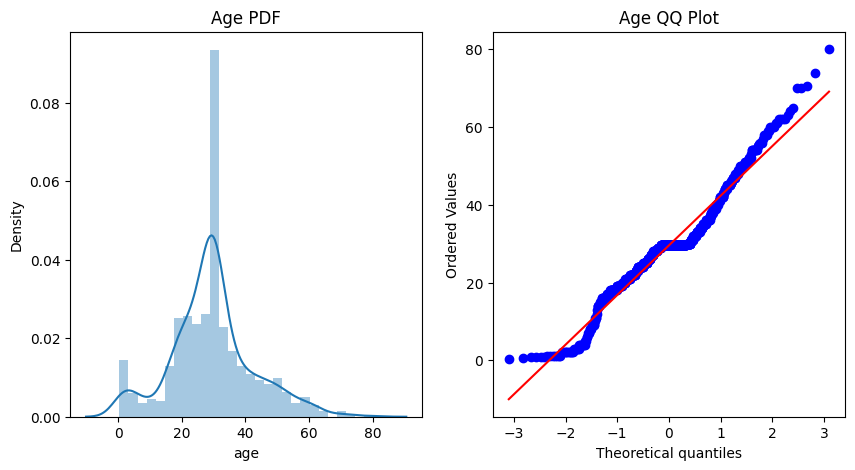

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')


plt.show()



As you see the Age is not completely distributed in normally.

<ipython-input-44-419113823177>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'])


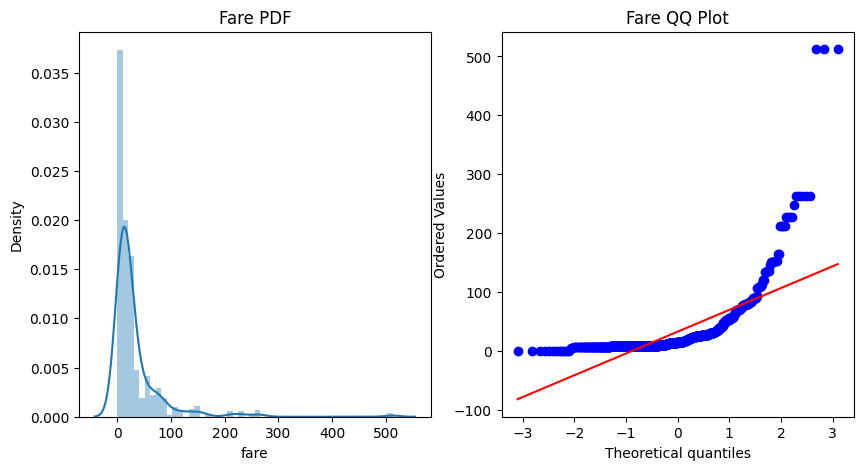

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')


plt.show()



Now Without applying any transformation.

First we will create Object of the Model.

Then we will Fit this on the X_train and y_train



In [46]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [51]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.6480446927374302
0.6871508379888268


**Fit Transformation** is applied on the X_train.

and **Tranformation** is applied on the X_test.

In [52]:
trf = FunctionTransformer(func=np.log1p)

In [53]:
X_train_transfomer = trf.fit_transform(X_train)
X_test_transfomer = trf.transform(X_test)


In [54]:
clf3 = LogisticRegression()
clf4 = DecisionTreeClassifier()

In [59]:
clf3.fit(X_train_transfomer,y_train)
clf4.fit(X_train_transfomer,y_train)

y_pred3 = clf3.predict(X_test_transfomer)
y_pred4 = clf4.predict(X_test_transfomer)

In [60]:
print("LR :",accuracy_score(y_test,y_pred3)*100)
print("DT :",accuracy_score(y_test,y_pred4)*100)

LR : 68.15642458100558
DT : 68.71508379888269


**For Assurance we do the Train Test Split**

In [61]:
X_transformed = trf.fit_transform(X)

In [62]:
clf5 = LogisticRegression()
clf6 = DecisionTreeClassifier()

In [63]:
print("LR :",np.mean(cross_val_score(clf5,X_transformed,y,cv=10).mean()))
print("DT :",np.mean(cross_val_score(clf6,X_transformed,y,cv=10).mean()))

LR : 0.678027465667915
DT : 0.6610986267166042
